In [1]:
import matplotlib.font_manager
del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.family" : "serif",
          "font.serif" : ["Times New Roman"]}
plt.rcParams.update(params)

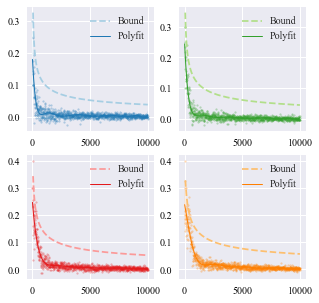

In [3]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
df_error_bounds_m = pd.read_csv('data/bounds_m.csv')
df_experiment_m = pd.read_csv('data/experiment_m.csv')

palette = sns.color_palette("Paired")

for i in range(4):
    
    d = 25*(i + 1)
    ax = fig.add_subplot(2, 2, i + 1,)
    error_line = sns.lineplot(
        x=df_error_bounds_m['m'][5:],
        y=df_error_bounds_m[str(d)][5:],
        color=palette[2*i],
        linestyle='dashed',
    )
    fit_line = sns.regplot(
        data=df_experiment_m,
        x='m',
        y=df_experiment_m[str(d)],
        order=10,
        line_kws={'color': palette[2*i+1], "lw": 1},
        scatter_kws={"s": 5, "color": palette[2*i+1], 'alpha': 0.3},
        ci=100,
        ax=ax,
    )
    ax.legend(['Bound', 'Polyfit'])
    ax.set_ylabel('') 
    ax.set_xlabel('')

plt.savefig("figs/experiment_m.svg", bbox_inches='tight')
plt.show()

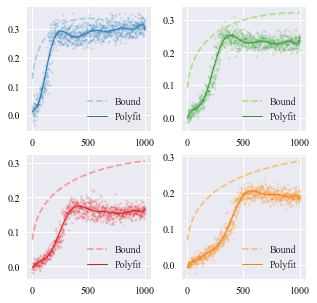

In [4]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.25)
df_error_bounds_d = pd.read_csv('data/bounds_d.csv')
df_experiment_d = pd.read_csv('data/experiment_d.csv')

palette = sns.color_palette("Paired")

for i in range(4):
    
    m = 500*(i + 1)
    ax = fig.add_subplot(2, 2, i + 1,)
    error_line = sns.lineplot(
        x=df_error_bounds_d['d'][1:],
        y=df_error_bounds_d[str(m)][1:],
        color=palette[2*i],
        linestyle='dashed',
    )
    fit_line = sns.regplot(
        data=df_experiment_d,
        x='d',
        y=df_experiment_d[str(m)],
        order=10,
        line_kws={'color': palette[2*i+1], "lw": 1},
        scatter_kws={"s": 5, "color": palette[2*i+1], 'alpha': 0.3},
        ci=100,
        ax=ax,
    )
    ax.legend(['Bound', 'Polyfit'])
    ax.set_ylabel('')
    ax.set_xlabel('')

plt.savefig("figs/experiment_d.svg", bbox_inches='tight')
plt.show()

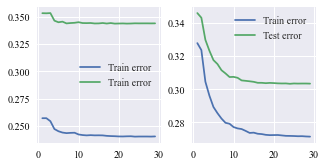

In [5]:
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(hspace=0.2, wspace=0.25)
df_experiment_T0 = pd.read_csv('data/experiment_T0.csv')
df_experiment_T1 = pd.read_csv('data/experiment_T1.csv')

ax1 = fig.add_subplot(1, 2, 1)
sns.lineplot(
    data=df_experiment_T0,
    y='test_error',
    x='T',
    ax=ax1,
)
sns.lineplot(
    data=df_experiment_T0,
    y='train_error',
    x='T',
    ax=ax1,
)
ax1.legend(['Train error', 'Train error'])
ax1.set_ylabel('') 
ax1.set_xlabel('')

ax2 = fig.add_subplot(1, 2, 2)
sns.lineplot(
    data=df_experiment_T1,
    y='test_error',
    x='T',
    ax=ax2,
)
sns.lineplot(
    data=df_experiment_T1,
    y='train_error',
    x='T',
    ax=ax2,
)
ax2.legend(['Train error', 'Test error'])
ax2.set_ylabel('') 
ax2.set_xlabel('')

plt.savefig("figs/experiment_T.svg", format="svg", bbox_inches='tight')
plt.show()

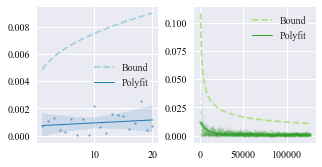

In [6]:
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(hspace=0.2, wspace=0.3)
df_real_bounds_d     = pd.read_csv('data/real_bounds_d.csv')
df_real_experiment_d = pd.read_csv('data/real_experiment_d.csv')
df_real_bounds_m     = pd.read_csv('data/real_bounds_m.csv')
df_real_experiment_m = pd.read_csv('data/real_experiment_m.csv')


ax1 = fig.add_subplot(1, 2, 1)
error_line = sns.lineplot(
    x=df_real_bounds_d['d'],
    y=df_real_bounds_d['bound'],
    color=palette[0],
    linestyle='dashed',
    ax=ax1,
)
fit_line = sns.regplot(
    data=df_real_experiment_d,
    x='d',
    y=df_real_experiment_d['error'],
    order=1,
    line_kws={'color': palette[1], "lw": 1},
    scatter_kws={"s": 5, "color": palette[1], 'alpha': 0.6},
    ci=100,
    ax=ax1,
)
ax1.legend(['Bound', 'Polyfit'])
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2 = fig.add_subplot(1, 2, 2)
error_line = sns.lineplot(
    x=df_real_bounds_m['m'][10:],
    y=df_real_bounds_m['bound'][10:],
    color=palette[2],
    linestyle='dashed',
    ax=ax2,
)
fit_line = sns.regplot(
    data=df_real_experiment_m,
    x='m',
    y=df_real_experiment_m['error'],
    order=5,
    line_kws={'color': palette[3], "lw": 1},
    scatter_kws={"s": 5, "color": palette[3], 'alpha': 0.1},
    ci=100,
    ax=ax2,
)
ax2.legend(['Bound', 'Polyfit'])
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.savefig("figs/real_experiment.svg", format="svg", bbox_inches='tight')
plt.show()